<a href="https://colab.research.google.com/github/Bamss01/Praktikum_AI_Workflow/blob/main/praktikum_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
data = {
    "Tanggal":["2025-03-01", "2025-03-02", "2025-03-03", "2025-03-04", "2025-03-05", "2025-03-06", "2025-03-07", "2025-03-08", "2025-03-9", "2025-03-10"],
    "Produk":["Kopi", "Kecap", "Beras", "Tepung", "Mie Goreng", "Susu", "Bihun", "Sandal", "Soda", "Ciki"],
    "Jumlah Terjual":[10, 6, 7, 3, 15, 10, 12, 6, 5, 7],
    "Stok":[20, 15, 20, 12, 25, 4, 5, 4, 5, 8],
    "Harga Satuan":[2000, 3000, 15000, 3000, 3500, 2000, 4000, 12000, 4000, 2000],

  }

dt = pd.DataFrame(data)

dt.to_csv("data_penjualan_latihan.CSV", index=False)

dt

,Tanggal,Produk,Jumlah Terjual,Stok,Harga Satuan
0,2025-03-01,Kopi,10,20,2000
1,2025-03-02,Kecap,6,15,3000
2,2025-03-03,Beras,7,20,15000
3,2025-03-04,Tepung,3,12,3000
4,2025-03-05,Mie Goreng,15,25,3500
5,2025-03-06,Susu,10,4,2000
6,2025-03-07,Bihun,12,5,4000
7,2025-03-08,Sandal,6,4,12000
8,2025-03-9,Soda,5,5,4000
9,2025-03-10,Ciki,7,8,2000


In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tanggal         10 non-null     object
 1   Produk          10 non-null     object
 2   Jumlah Terjual  10 non-null     int64 
 3   Stok            10 non-null     int64 
 4   Harga Satuan    10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 532.0+ bytes


In [11]:
dt["Tanggal"] = pd.to_datetime(dt["Tanggal"])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tanggal         10 non-null     datetime64[ns]
 1   Produk          10 non-null     object        
 2   Jumlah Terjual  10 non-null     int64         
 3   Stok            10 non-null     int64         
 4   Harga Satuan    10 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 532.0+ bytes


In [12]:
dt["Tanggal"] = pd.to_datetime(dt["Tanggal"])

dt["Total Penjualan"] = dt["Jumlah Terjual"] * dt["Harga Satuan"]
dt["Keuntungan"] = dt["Total Penjualan"] - (dt["Jumlah Terjual"] * 10000)
dt

,Tanggal,Produk,Jumlah Terjual,Stok,Harga Satuan,Total Penjualan,Keuntungan
0,2025-03-01,Kopi,10,20,2000,20000,-80000
1,2025-03-02,Kecap,6,15,3000,18000,-42000
2,2025-03-03,Beras,7,20,15000,105000,35000
3,2025-03-04,Tepung,3,12,3000,9000,-21000
4,2025-03-05,Mie Goreng,15,25,3500,52500,-97500
5,2025-03-06,Susu,10,4,2000,20000,-80000
6,2025-03-07,Bihun,12,5,4000,48000,-72000
7,2025-03-08,Sandal,6,4,12000,72000,12000
8,2025-03-09,Soda,5,5,4000,20000,-30000
9,2025-03-10,Ciki,7,8,2000,14000,-56000


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = dt[["Jumlah Terjual", "Stok"]]
y = (dt["Stok"] < 5).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = model.predict(X_test)
print("Akurasi Model: ", accuracy_score(y_test, y_pred))

Akurasi Model:  1.0


In [15]:
produk_baru = [[5, 6]]
predict = model.predict(produk_baru)

if predict[0] == 1:
  print("Perlu di restock")
else:
  print("Stock masih cukup")

Stock masih cukup


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


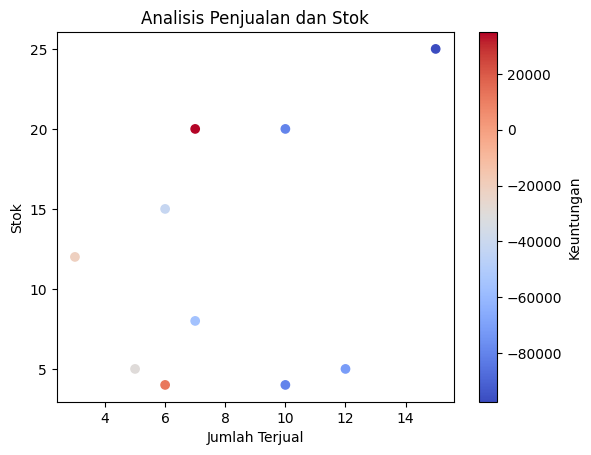

In [16]:
import matplotlib.pyplot as plt

plt.scatter(dt["Jumlah Terjual"], dt["Stok"], c=dt["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Keuntungan")
plt.show()